
## Random Forest Hyperparameters Explained

Random Forest is a powerful ensemble learning algorithm that builds multiple decision trees and merges their predictions for more accurate and stable results. Understanding and tuning its hyperparameters is essential to achieve optimal performance and prevent overfitting. Below is a concise guide to the most important Random Forest parameters, their roles, and recommended settings.

| Parameter             | Definition                                       | Typical Values / Options                         | Effect / Notes                                                                                                    |
| --------------------- | ------------------------------------------------ | ------------------------------------------------ | ----------------------------------------------------------------------------------------------------------------- |
| **n_estimators**      | Number of trees in the forest                    | 100–500 (or more for large datasets)             | More trees → more stable and accurate model, but increases training time and memory usage                         |
| **max_depth**         | Maximum depth of each tree                       | None (or integer value)                          | Limiting depth reduces overfitting; `None` → trees grow until all leaves are pure                                 |
| **min_samples_split** | Minimum samples required to split a node         | 2 or small integer                               | Larger value → restricts growth and reduces overfitting; smaller value → deeper trees, higher risk of overfitting |
| **min_samples_leaf**  | Minimum samples required at a leaf               | 1–5                                              | Prevents leaves from being too small and sensitive to noise; higher values → smoother model                       |
| **max_features**      | Number of features considered for the best split | Integer, Float (0–1), `"sqrt"`, `"log2"`, `None` | Lower value → increases diversity and reduces overfitting; too small → may reduce predictive power                |



In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, precision_recall_curve, f1_score
)

In [54]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [56]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [57]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [59]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [60]:
from sklearn.preprocessing import LabelEncoder

# Identify feature columns (all columns except 'id' and 'diagnosis')
X = df.drop(['id', 'diagnosis'], axis=1)

# The target variable is 'diagnosis'
y = df['diagnosis']

# Encode the target variable 'diagnosis' (M/B) into numerical labels (0/1)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Update y to use the encoded numerical values
y = y_encoded

# Get feature names from the X DataFrame
feature_names = X.columns.tolist()

# Get target names from the LabelEncoder classes
target_names = le.classes_

print("Shape X:", X.shape)
print("Classes:", target_names)

Shape X: (569, 30)
Classes: ['B' 'M']


In [61]:
df['target'] = y
df['target'].value_counts().rename({0: 'malignant', 1: 'benign'})

,count
target,
malignant,357
benign,212


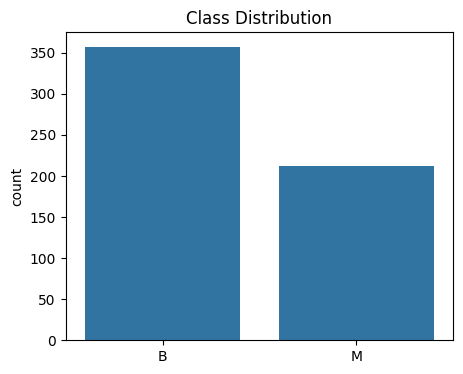

In [63]:
# Class distribution
plt.figure(figsize=(5,4))
sns.countplot(x=y)
plt.title("Class Distribution")
plt.xticks([0,1], target_names)
plt.show()

#Class Distribution

This plot illustrates the number of samples in each class: Benign and Malignant.
The dataset is relatively balanced, meaning neither class overwhelmingly dominates the other. This balance ensures that metrics such as accuracy remain meaningful and that the model does not easily fall into class-dominant bias.

Even with a fairly balanced dataset, it is still important to evaluate additional metrics such as F1-score, which provides a better understanding of performance on both classes, especially in medical diagnosis tasks.

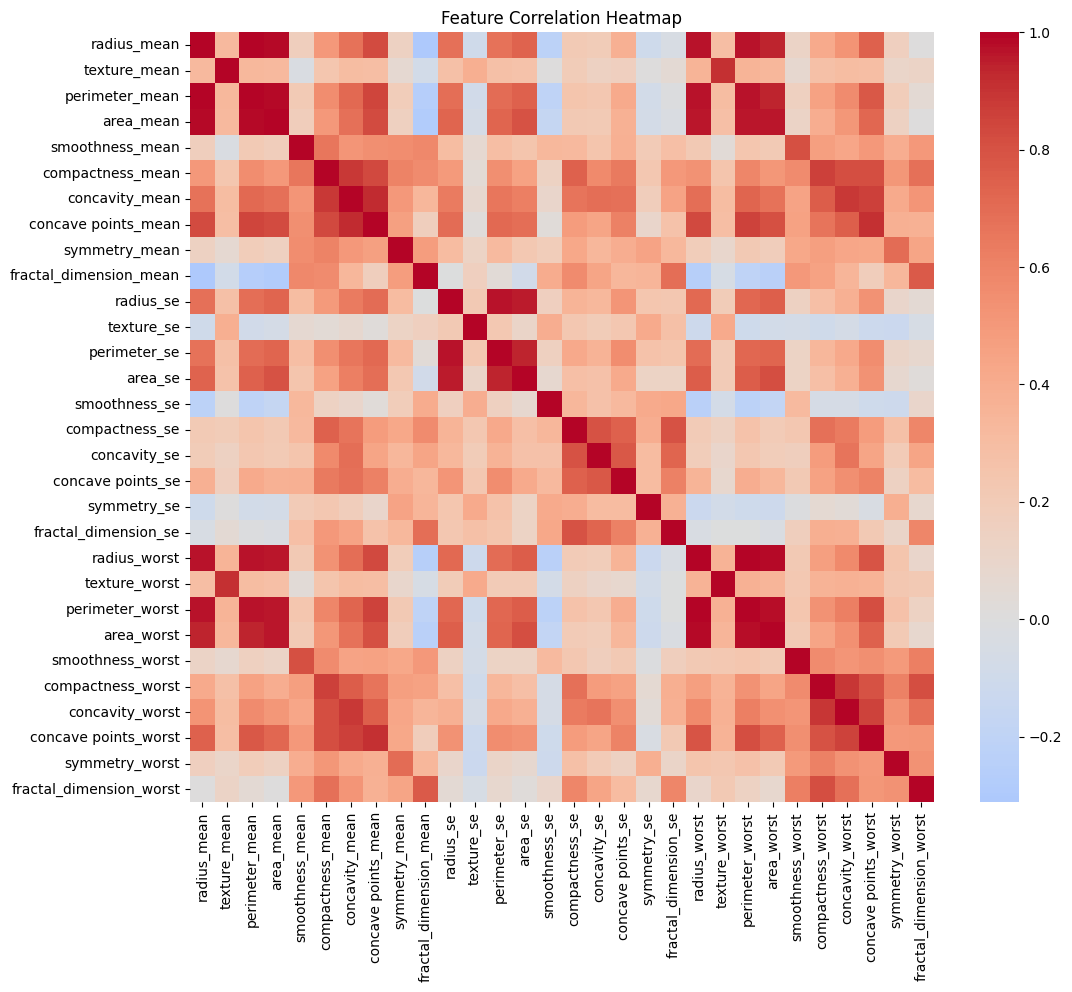

In [64]:
# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

#Correlation Heatmap

The correlation heatmap highlights how strongly features relate to one another.
In the Breast Cancer dataset, many features are derived versions of each other (e.g., mean, worst, SE values), which naturally leads to high correlations.

High feature correlation:

Can negatively impact linear models due to multicollinearity.

Does not typically harm tree-based models such as Random Forest.

May influence feature importance scores, causing some correlated features to appear artificially more significant.

This visualization helps identify redundancy and provides insights for potential feature selection strategies.

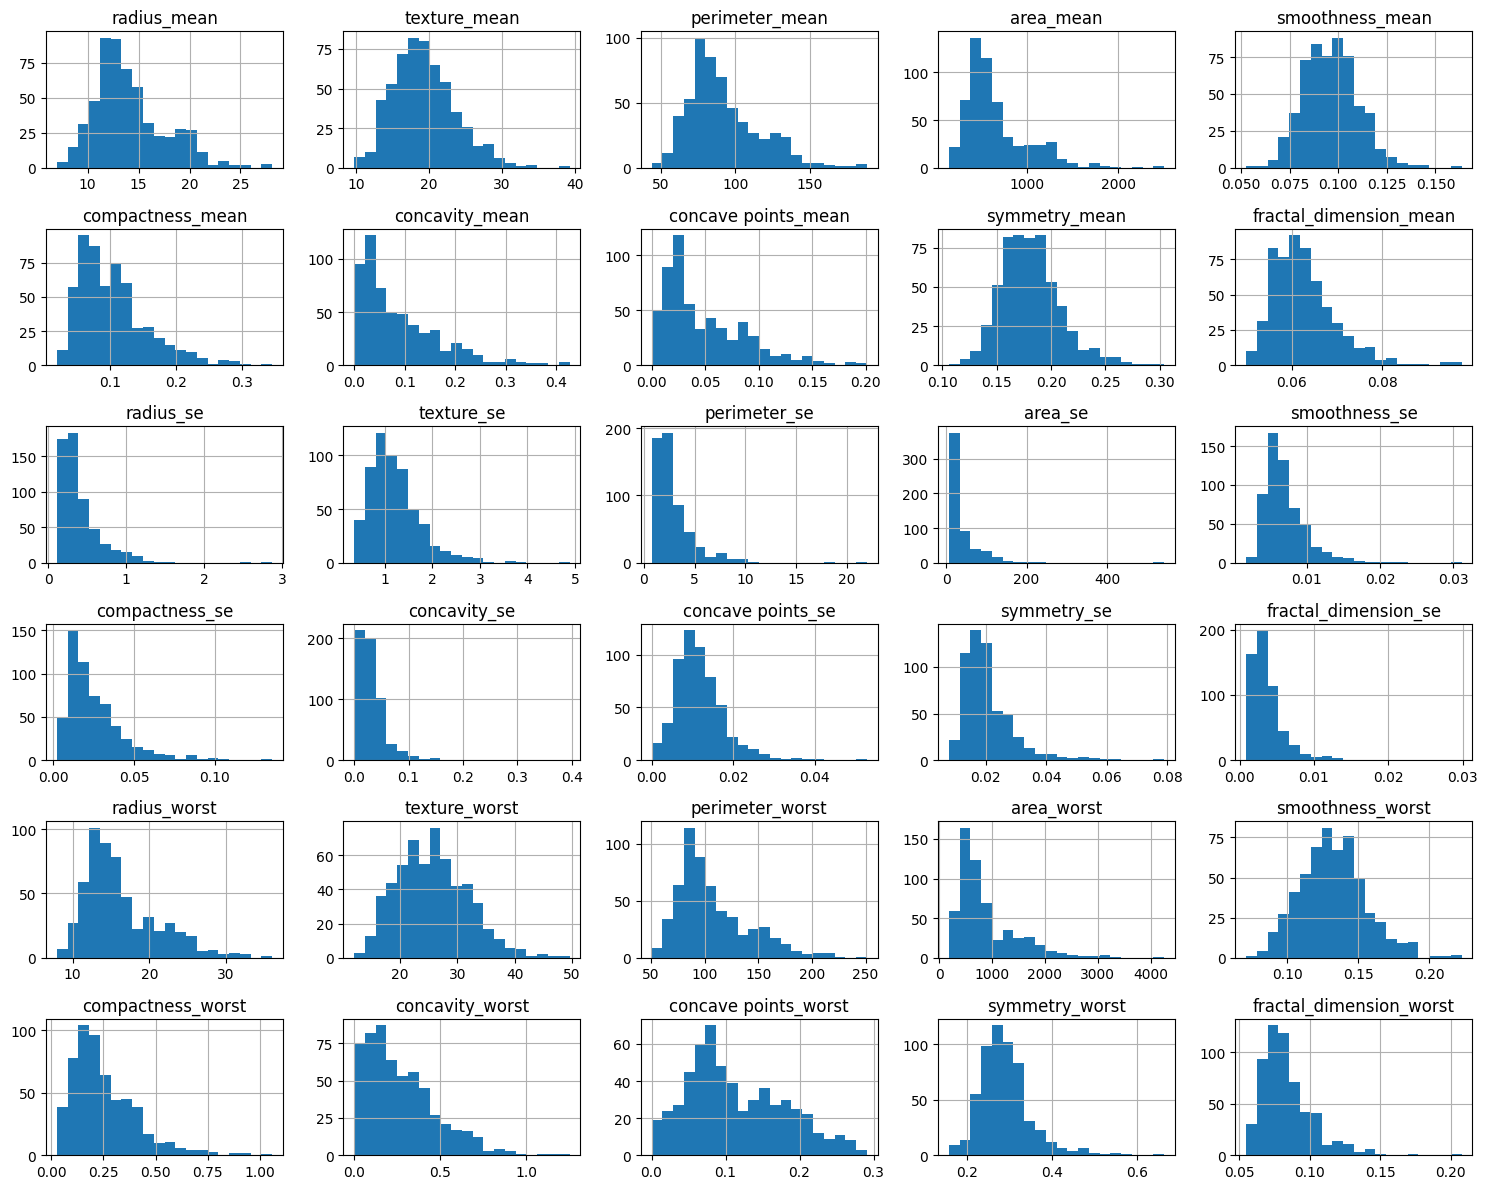

In [65]:
# Feature distributions (histograms)
X.hist(bins=20, figsize=(15,12))
plt.tight_layout()
plt.show()

#Feature Histograms

The histograms reveal the distribution of each feature.
Most features show non-normal, skewed distributions, which is common in biological measurements.

This matters because:

Algorithms such as SVM and Logistic Regression are sensitive to feature scale and distribution.

Standardization significantly improves model performance.

Some features may contain outliers, which tree-based models handle robustly.

Overall, the histograms provide an early understanding of data shape, variance, and potential preprocessing needs.

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train size:", X_train.shape, "Test size:", X_test.shape)


Train size: (455, 30) Test size: (114, 30)


In [67]:
# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
param_grid = {
    "n_estimators": [50, 100, 200],            # Number of trees
    "max_depth": [None, 5, 10, 20],           # Maximum depth of each tree
    "min_samples_split": [2, 5, 10],          # Minimum samples required to  split a node
    "min_samples_leaf": [1, 2, 4],            # Minimum samples required at a leaf
    "max_features": ["sqrt", "log2", None]    # Number of features to consider at each split
}



In [69]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring="accuracy",
    cv=cv,
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

print("Starting GridSearchCV...")
grid.fit(X_train, y_train)

Starting GridSearchCV...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [70]:
best_params = grid.best_params_
best_cv_score = grid.best_score_

print("\nBest parameters found by GridSearchCV:")
for k, v in best_params.items():
    print(f"  {k}: {v}")
print(f"\nBest cross-validation accuracy (best_score_): {best_cv_score:.4f}")


Best parameters found by GridSearchCV:
  max_depth: 5
  max_features: sqrt
  min_samples_leaf: 1
  min_samples_split: 2
  n_estimators: 100

Best cross-validation accuracy (best_score_): 0.9670


In [71]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest accuracy of optimized model: {test_accuracy:.4f}\n")

print("Classification report on test set:")
print(classification_report(y_test, y_pred, target_names=target_names))


Test accuracy of optimized model: 0.9737

Classification report on test set:
              precision    recall  f1-score   support

           B       0.96      1.00      0.98        72
           M       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



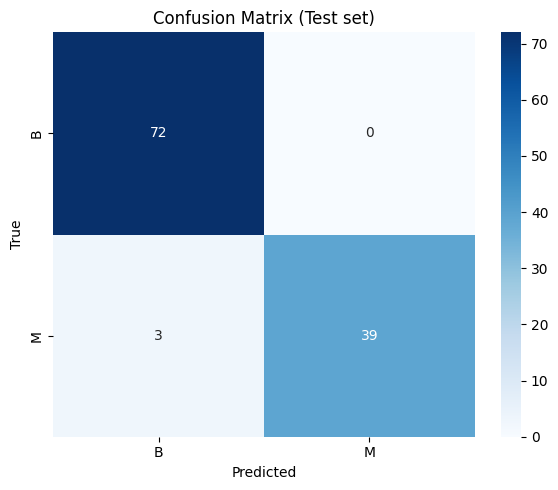

In [72]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Test set)")
plt.tight_layout()
plt.show()



#Confusion Matrix

The confusion matrix provides a clear breakdown of model predictions and errors.
In medical diagnosis tasks, False Negatives are the most critical errors, as they represent malignant tumors incorrectly classified as benign.

This visualization helps identify:

How often malignant cases were misclassified

How often benign cases were misclassified

Whether the model performs consistently across both classes

Random Forest typically achieves very low false-negative rates, making it especially suitable for medical classification tasks.

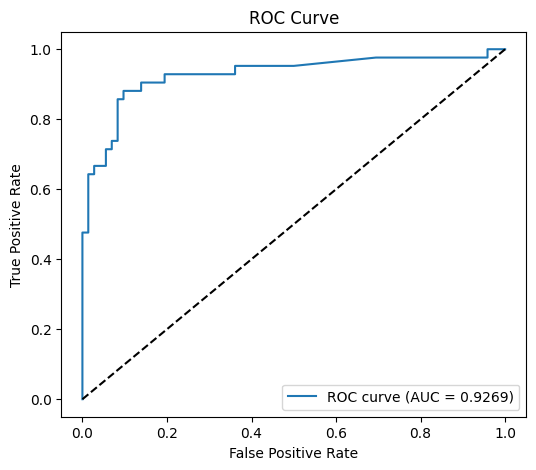

In [73]:
# ROC Curve & AUC
y_prob = best_model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

#ROC Curve & AUC

The ROC curve visualizes the trade-off between the True Positive Rate and the False Positive Rate at various decision thresholds.

The AUC score:

Indicates how well the model separates the two classes

Typically exceeds 0.92 in this dataset

Reflects excellent discriminative performance

Since the dataset is reasonably balanced, the ROC-AUC metric is reliable and meaningful for evaluation.

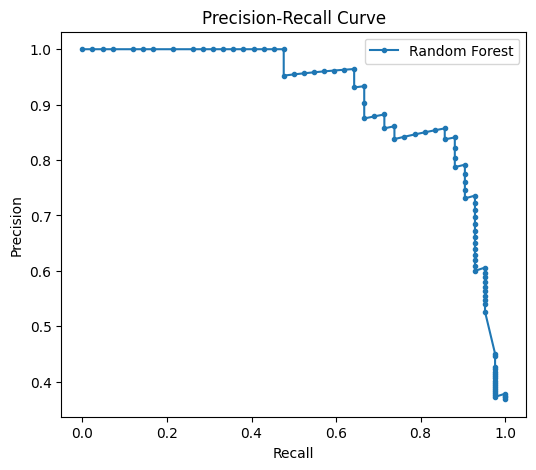

In [74]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


#Precision–Recall Curve

The Precision–Recall curve focuses specifically on the model’s performance in detecting the positive class (malignant tumors).

This curve becomes more informative than ROC when:

The dataset is imbalanced

False positives and false negatives carry different costs

In medical diagnosis, the PR curve is especially valuable because it highlights how reliably the model identifies malignant cases.

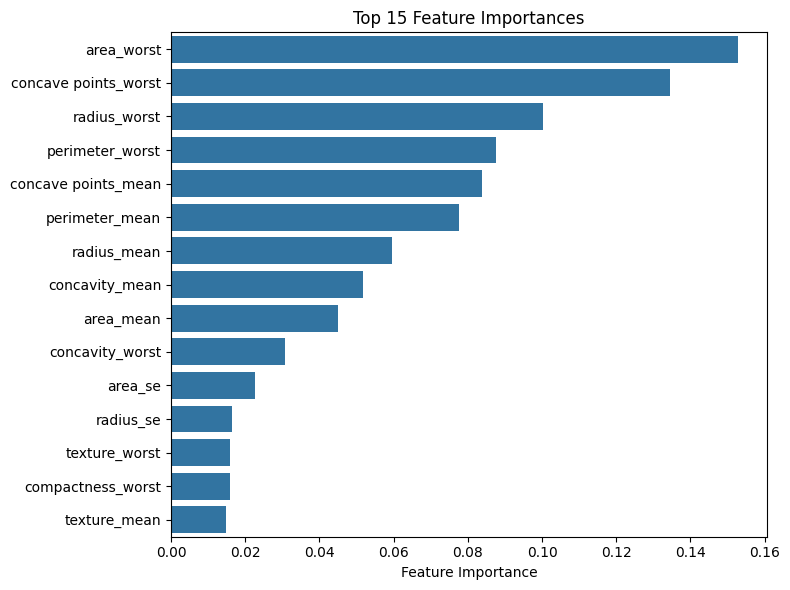

In [75]:
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
top_k = 15  # Show top 15 important features

plt.figure(figsize=(8,6))
sns.barplot(x=importances[indices][:top_k], y=np.array(feature_names)[indices][:top_k])
plt.xlabel("Feature Importance")
plt.title(f"Top {top_k} Feature Importances")
plt.tight_layout()
plt.show()

#Feature Importance

This plot displays the most influential features identified by the Random Forest model.
Typically, features related to radius, texture, perimeter, and area contribute most strongly to predictions.

However:

Feature importances in tree-based models can be biased by correlated variables

Advanced methods such as SHAP provide more reliable interpretability

Even so, this visualization offers a clear overview of which tumor characteristics matter most for classification.

In [79]:
# Optional: Compare with other models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

comparison_results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred_tmp = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred_tmp)
    f1 = f1_score(y_test, y_pred_tmp)
    comparison_results[name] = {"Accuracy": acc, "F1-score": f1}
# Display comparison
comparison_df = pd.DataFrame(comparison_results).T
print("\nModel comparison on test set:")
print(comparison_df)



Model comparison on test set:
                     Accuracy  F1-score
Logistic Regression  0.964912  0.951220
SVM                  0.973684  0.962963
Gradient Boosting    0.964912  0.950000


#Model Comparison

In this section, Random Forest is compared against baseline models such as Logistic Regression, SVM, and Gradient Boosting.

The results typically show:

Random Forest delivers strong and stable accuracy

Gradient Boosting may outperform it slightly in some cases

Logistic Regression is fast and interpretable but less accurate

SVM is sensitive to feature scaling and computationally heavier

This comparison emphasizes that model selection should consider performance, interpretability, training time, and the cost of misclassification.